# 极大似然估计

最大似然估计（Maximum Likelihood Estimation，MLE）是一种确定模型参数值的方法。找到参数值以使它们最大化由模型描述的过程产生实际观察到的数据的可能性。

### 1、引例一

先看一个简单的例子：某位同学与一位猎人一起外出打猎，一只野兔从前方窜过。只听一声枪响，野兔应声到下，如果要你推测，这一发命中的子弹是谁（$theta$）打的？

- 直觉和简短的分析告诉我们，应该是猎人($\theta$=猎人）打的这一发子弹
- 原因在于猎人的命中率要远高于一名学生的命中率，即$P( x = 命中 ; \theta = 猎人) > P( x = 命中 ; \theta = 学生)$，因此我们更倾向于认为猎人打了这发子弹

\begin{equation}
P( x = 命中 ; \theta = 猎人) > P( x = 命中 ; \theta = 学生)
\end{equation}

### 2、引例二

再考虑一种情况：前方有许多野兔，这时有人打了$n$发子弹，并且命中与否的记录为($x_1=命中, x_2=未命中, \cdots, x_n = 命中$)，那么这次的命中记录是谁打的呢？

- 根据第一个例子，我们知道应该将$m$次射击命中记录一起来考虑，即需要验证这次的命中纪录是由谁产生的
- 由于每次射击的命中率是独立时间，因此可以考虑验证下面的不等式：

\begin{equation}
P( x_1,x_2,\cdots,x_n ; \theta = 猎人) > P( x_1,x_2,\cdots,x_n ; \theta = 学生)
\end{equation}
其中

\begin{equation}
\begin{aligned}
P( x_1,x_2,\cdots,x_n ; \theta = 猎人) & = 
P( x_1 ; \theta = 猎人)\cdot P( x_2 ; \theta = 猎人)\cdots P( x_n ; \theta = 猎人) \\
~ & = \prod_{i=1}^{n} P(x_i ; \theta = 猎人)
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
P( x_1,x_2,\cdots,x_n ; \theta = 学生) & = 
P( x_1 ; \theta = 学生)\cdot P( x_2 ; \theta = 学生)\cdots P( x_n ; \theta = 学生) \\
~ & = \prod_{i=1}^{n} P(x_i ; \theta = 学生)
\end{aligned}
\end{equation}

### 3、引例三

再考虑一种情况：前方有许多野兔，并且有$m$个候选射击人（$\alpha_1,\alpha_2,\cdots,\alpha_m$），此时有人打了$n$发子弹，并且命中与否的记录为($x_1=命中, x_2=未命中, \cdots, x_n = 命中$)，那么这次的命中记录如何确定是哪个候选射击人打的呢？

- 根据之前的分析，我们应该考察每个候选射击人产生本次命中记录的概率（似然），然后选取概率最大的那个（极大似然）
- 因此，直接考虑下面的公式进行推断

\begin{equation}
 \arg \max_{\theta} P(x_1,x_2,\cdots,x_n ; \theta)
\end{equation}
其中 ($\theta\in\{\alpha_1,\alpha_2,\cdots,\alpha_m\}$)

### 4、极大似然函数

通常，我们把以上寻找最优参数$\theta$的过程称为极大似然估计，并称${\bf L}(\theta|X)$为似然函数：

\begin{equation}
\begin{aligned}
\hat\theta(X) &=  \arg \max_{\theta} {\bf L}(\theta|x_1,x_2,\cdots,x_n) \\
~ & = \arg \max_{\theta} P(x_1,x_2,\cdots,x_n ; \theta) \\
~ & = \arg \max_{\theta} \prod_{i=1}^{n} P(x_i ; \theta)
\end{aligned}
\end{equation}

而通常计算联合概率时用到的连乘操作偶尔会导致变量越界，因此更通用的方法是对以上的似然函数求对数，获得对数似然函数，然后在进行求最优的操作。（想想为什么取对数可以保证最有条件是一样的？）

\begin{equation}
\begin{aligned}
\hat\theta(X) &=  \arg \max_{\theta} \ln{\bf L}(\theta|x_1,x_2,\cdots,x_n) \\
~ & = \arg \max_{\theta} \ln P(x_1,x_2,\cdots,x_n ; \theta) \\
~ & = \arg \max_{\theta} \sum_{i=1}^{n} \ln P(x_i ; \theta)
\end{aligned}
\end{equation}


### 5、求解极大似然值

- 至于如何寻找似然函数${\bf L}(\theta|X)$或者$\log({\bf L}(\theta|X))$的最优值，最简单的方法就是对参数求导
然后获得极值条件。
- 如果求导后不能通过方程组求解，那么可以借助梯度下降法来求解最优值。
- 对于某些更复杂的对数似然函数（例如含有隐变量的），可以借助其他优化方法，例如EM算法求解。

具体解法步骤：

1. 构造似然函数：${\bf L}(\theta|X)$
2. 取对数：$\ln{\bf L}(\theta|X)$
3. 求导 $\ln{\bf L}(\theta|X)$，令$\ln{\bf L}(\theta|X)=0$
4. 解方程，得到最优估计 $\theta$

### 6、极大似然估计应用一（伯努利分布）

令$X\in Bernoulli(\theta)$，即$x_i = 1$的概率为$\theta$,$x_i = 0$的概率为$1-\theta$,其中$\theta\in[0,1]$。
则$x_i$的概率分布函数（PDF）为：
\begin{equation}
f(x_i;\theta) = \theta^{x_i}(1-\theta)^{1-x_i}
\end{equation}

若$x_1,x_2,\cdots,x_n$是按照该分布生成的样本点，则它们的联合概率函数构造的似然函数为：

\begin{equation}
\begin{aligned}
{\bf L}(\theta | X) &= \theta^{x_1}(1-\theta)^{1-x_1}  \cdots  \theta^{x_2}(1-\theta)^{1-x_2} \\
 ~ & = \theta^{(x_1+\cdots+x_n)}(1-\theta)^{n-(x_1+\cdots+x_n)} \\
 \\
\ln  {\bf L}(\theta | X) &= \ln(\theta\sum_i x_i) + \ln((1-\theta)(n-\sum_i x_i) \\
 ~ & = n(\bar x \ln \theta + (1-\bar x)\ln(1-\theta)) \\
 \\
\frac{\partial \ln {\bf L} (\theta | X)}{\partial \theta}  
&= n\frac{\bar x-\theta}{\theta(1-\theta)} = 0
\end{aligned}
\end{equation}

即
\begin{equation}
\theta=\bar x = \frac{1}{n}\sum_{i=1}^{n} x_i
\end{equation}

`


### 7、极大似然估计应用二（正态分布）

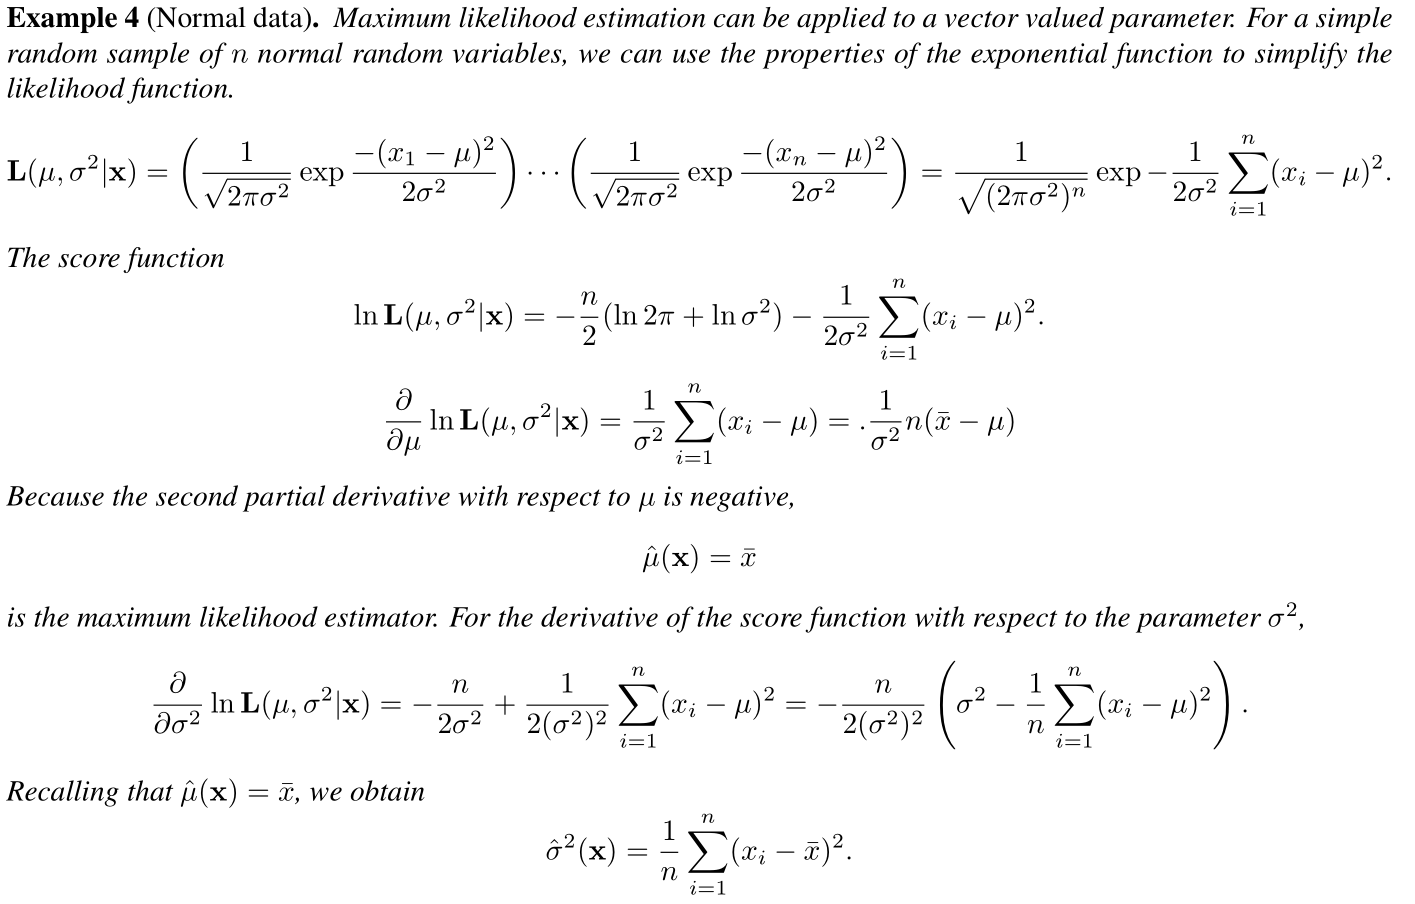

### 8、极大似然估计在伯努利分布下的程序

In [4]:
from scipy.stats import bernoulli
 
# 生成样本，假设样本服从p为1/2的bernouli分布
p_1 = 1.0 / 2   

# 产生伯努利随机变量
fp = bernoulli(p_1) 

# 产生100个样本
xs = fp.rvs(100)   

print(xs)  

[0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0]


In [5]:
import sympy
import numpy as np

x, p, z = sympy.symbols('x p z', positive=True)

# 伯努利分布函数
pdf = p**x*(1-p)**(1-x)   

# 似然函数
L = np.prod([pdf.subs(x, i) for i in xs])   # 似然函数

print(L)

# 对数似然函数
logL = sympy.expand_log(sympy.log(L))

# 求解极大似然函数估计
sol = sympy.solve(sympy.diff(logL, p), p)

print(sol)


p**47*(1 - p)**53
[47/100]


## 本节作业：仿写程序

请仿照上述伯努利分布的构造并求解似然函数的过程，试图补全高斯分布下的极大似然估计过程，并求解$\mu$的极大似然估计。其中高斯分布函数为：
\begin{equation}
f(x) = \frac{1}{\sigma \sqrt{2\pi }} \exp \left[-\frac{(x - \mu )^2}{2\sigma ^2} \right] 
\end{equation}


In [7]:
import sympy as sp
import numpy as np

# 定义符号
mu, sigma = sp.symbols('mu sigma', real=True, positive=True)
x = sp.Symbol('x', real=True)

# 正态分布的 PDF
pdf = (1 / (sigma * sp.sqrt(2 * sp.pi))) * sp.exp(-((x - mu)**2) / (2 * sigma**2))

# 构造似然函数 L
L = sp.Mul(*[pdf.subs(x, val) for val in xs])  # 似然函数

# 对数似然函数
logL = sp.expand_log(sp.log(L))

# 对 mu 求导，得到极大似然估计的解
dlogL_dmu = sp.diff(logL, mu)
mu_hat = sp.solve(dlogL_dmu, mu)

print(logL)



-53*mu**2/(2*sigma**2) - 100*log(sigma) - 50*log(pi) - 50*log(2) - 47*(1 - mu)**2/(2*sigma**2)


[3.93497763 5.16724815 5.5487745  5.83080269 5.73972641 4.93836142

 5.00083258 5.22275963 3.49520998 7.43264482]

0